In [654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, GRU, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
import os
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


# plt.style.use('dark_background')
plt.style.use('default')

In [11]:
path = 'C:\\Users\\User\\Desktop\\Data_Science\\TimeSeries\\Features_Generation\\dataset\\archive (5)'

In [17]:
doc_path_1 = os.path.join(path, 'fundamentals.csv')
doc_path_2 = os.path.join(path, 'prices.csv')
doc_path_3 = os.path.join(path, 'prices-split-adjusted.csv')
doc_path_4 = os.path.join(path, 'securities.csv')

In [19]:
df_fundamentals = pd.read_csv(doc_path_1)
df_prices = pd.read_csv(doc_path_2)
df_prices_adjusted = pd.read_csv(doc_path_3)
df_securities = pd.read_csv(doc_path_4)

In [45]:
print(df_fundamentals.head())
print(df_fundamentals.info())

   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09

In [29]:
df_prices.head()


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [33]:
df_prices_adjusted.head()
# df_prices_adjusted.info()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [35]:
df_securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [43]:
print(df_securities['GICS Sector'].value_counts())
print(df_securities['GICS Sub Industry'].value_counts())

GICS Sector
Consumer Discretionary         85
Industrials                    69
Information Technology         68
Financials                     64
Health Care                    59
Consumer Staples               37
Energy                         36
Real Estate                    29
Utilities                      28
Materials                      25
Telecommunications Services     5
Name: count, dtype: int64
GICS Sub Industry
Industrial Conglomerates              21
Internet Software & Services          20
Oil & Gas Exploration & Production    18
Health Care Equipment                 17
REITs                                 16
                                      ..
Trucking                               1
Agricultural Products                  1
Electronic Equipment & Instruments     1
Distributors                           1
Casinos & Gaming                       1
Name: count, Length: 124, dtype: int64


In [47]:
df_securities_health_eq = df_securities[df_securities['GICS Sub Industry'] == 'Health Care Equipment']

In [100]:
health_eq_companies = df_securities_health_eq['Ticker symbol'].unique()
print(health_eq_companies)

health_eq_companies = np.delete(health_eq_companies, 0)
health_eq_companies

['ABT' 'A' 'BCR' 'BAX' 'BDX' 'BSX' 'EW' 'HOLX' 'IDXX' 'ISRG' 'JNJ' 'MDT'
 'PKI' 'SYK' 'TMO' 'VAR' 'ZBH']


array(['A', 'BCR', 'BAX', 'BDX', 'BSX', 'EW', 'HOLX', 'IDXX', 'ISRG',
       'JNJ', 'MDT', 'PKI', 'SYK', 'TMO', 'VAR', 'ZBH'], dtype=object)

In [72]:
df_prices['date_upd'] = df_prices['date'].str.split(expand = True)[0]

In [76]:
df_prices['date_upd'] = pd.to_datetime(df_prices['date_upd'])

In [460]:
df_prices_study = df_prices[df_prices['date_upd'].dt.year >= 2013]
df_prices_abt = df_prices_study[df_prices_study['symbol'] == 'ABT']

In [462]:
df_prices_abt = df_prices_abt.drop(columns = ['date'])
print(df_prices_abt.info())
df_prices_abt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 354335 to 850770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   symbol    1008 non-null   object        
 1   open      1008 non-null   float64       
 2   close     1008 non-null   float64       
 3   low       1008 non-null   float64       
 4   high      1008 non-null   float64       
 5   volume    1008 non-null   float64       
 6   date_upd  1008 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.0+ KB
None


,symbol,open,close,low,high,volume,date_upd
354335,ABT,32.299999,32.049999,31.639999,32.450001,20266400.0,2013-01-02
354818,ABT,32.900002,33.270000,32.740002,33.380001,22148200.0,2013-01-03
355301,ABT,33.330002,33.070000,32.849998,33.430000,15820100.0,2013-01-04
355784,ABT,33.020000,33.340000,32.849998,33.340000,13120000.0,2013-01-07
356267,ABT,33.290001,33.349998,33.080002,33.560001,15042300.0,2013-01-08


In [102]:
df_prices_health_eq = df_prices_study[df_prices_study['symbol'].isin(health_eq_companies)]

In [146]:
df_prices_health_eq = df_prices_health_eq.drop(columns = ['date'])
df_prices_health_eq

,symbol,open,close,low,high,volume,date_upd
354329,A,42.169999,41.879999,41.150001,42.169999,8790200.0,2013-01-02
354382,BAX,67.359998,67.650000,67.059995,67.660000,4907900.0,2013-01-02
354386,BCR,99.389999,101.830002,99.389999,101.849998,1017300.0,2013-01-02
354387,BDX,79.260002,79.449997,78.730003,79.449997,1011300.0,2013-01-02
354395,BSX,5.860000,5.890000,5.760000,5.900000,12050300.0,2013-01-02
...,...,...,...,...,...,...,...
851125,PKI,52.419998,52.150002,51.950001,52.480000,355800.0,2016-12-30
851185,SYK,120.660004,119.809998,119.349998,120.860001,988100.0,2016-12-30
851198,TMO,142.160004,141.100006,140.449997,142.339996,1063200.0,2016-12-30
851223,VAR,90.660004,89.779999,89.449997,90.680000,554100.0,2016-12-30


In [168]:
df_final_study = df_prices_abt.copy()

for i, comp in enumerate(health_eq_companies):
    temp = df_prices_health_eq[df_prices_health_eq['symbol'] == comp]
    temp = temp.drop(columns = ['symbol'])
    df_final_study = pd.merge(df_final_study, temp, how = 'inner', on = 'date_upd', suffixes = (None, comp))

df_final_study
    

,symbol,open,close,low,high,volume,date_upd,openA,closeA,lowA,...,openVAR,closeVAR,lowVAR,highVAR,volumeVAR,openZBH,closeZBH,lowZBH,highZBH,volumeZBH
0,ABT,32.299999,32.049999,31.639999,32.450001,20266400.0,2013-01-02,42.169999,41.879999,41.150001,...,71.260002,72.470001,71.050003,72.500000,1325100.0,67.599998,67.699997,67.339996,67.889999,1397500.0
1,ABT,32.900002,33.270000,32.740002,33.380001,22148200.0,2013-01-03,41.940000,42.029999,41.579999,...,72.589996,73.680000,72.510002,73.800003,1353500.0,67.730003,68.669998,67.570000,68.879997,1575000.0
2,ABT,33.330002,33.070000,32.849998,33.430000,15820100.0,2013-01-04,42.139999,42.860000,41.860001,...,73.680000,72.720001,72.599998,73.870003,1138500.0,68.720001,69.019997,68.550003,69.139999,1190800.0
3,ABT,33.020000,33.340000,32.849998,33.340000,13120000.0,2013-01-07,42.600000,42.550001,42.380000,...,72.199997,75.190002,72.199997,75.230003,1703500.0,68.760002,69.190002,68.709999,69.330002,957000.0
4,ABT,33.290001,33.349998,33.080002,33.560001,15042300.0,2013-01-08,42.469999,42.209999,42.099999,...,75.000000,74.839996,74.180000,75.440002,716600.0,69.169998,69.290001,68.610001,69.389999,905200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,ABT,38.330002,38.419998,38.220001,38.650002,4625600.0,2016-12-23,46.080002,46.200001,45.930000,...,90.540001,91.010002,89.949997,91.320000,252400.0,101.570000,102.320000,101.430000,102.699997,664000.0
1004,ABT,38.480000,38.599998,38.470001,38.939999,6633700.0,2016-12-27,46.369999,46.509998,46.320000,...,91.080002,91.580002,91.080002,91.870003,328000.0,102.529999,103.139999,101.980003,103.389999,1146500.0
1005,ABT,38.630001,38.220001,38.080002,38.770000,6828500.0,2016-12-28,46.509998,45.720001,45.680000,...,91.540001,90.650002,90.589996,91.610001,312100.0,102.839996,103.059998,102.839996,104.199997,1315600.0
1006,ABT,38.299999,38.310001,38.110001,38.509998,7050800.0,2016-12-29,45.680000,45.639999,45.570000,...,90.540001,90.239998,89.959999,91.160004,482100.0,103.000000,103.500000,102.830002,103.739998,683300.0


In [128]:
df_final_study

,dateA,symbolA,openA,closeA,lowA,highA,volumeA,dateA,symbolA,openA,...,highVAR,volumeVAR,date,symbol,open,close,low,high,volume,date_upd


In [154]:
df_fundamentals_abt = df_fundamentals[df_fundamentals['Ticker Symbol'] == 'ABT']

In [156]:
df_fundamentals_abt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 20 to 23
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           4 non-null      int64  
 1   Ticker Symbol                                        4 non-null      object 
 2   Period Ending                                        4 non-null      object 
 3   Accounts Payable                                     4 non-null      float64
 4   Accounts Receivable                                  4 non-null      float64
 5   Add'l income/expense items                           4 non-null      float64
 6   After Tax ROE                                        4 non-null      float64
 7   Capital Expenditures                                 4 non-null      float64
 8   Capital Surplus                                      4 non-null      float64


In [160]:
df_fundamentals_abt.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
20,20,ABT,2012-12-31,1.088900e+10,36000000.0,-1.260000e+09,22.0,-1.795000e+09,0.0,114.0,...,3.132300e+10,1.328000e+10,2.672100e+10,4.051400e+10,6.723500e+10,1.905000e+10,-5.591000e+09,2012.0,3.76,1.585904e+09
21,21,ABT,2013-12-31,5.948000e+09,-113000000.0,5.300000e+07,10.0,-1.145000e+09,0.0,85.0,...,1.924700e+10,9.507000e+09,2.517100e+10,1.778200e+10,4.295300e+10,1.965700e+10,-6.844000e+09,2013.0,1.64,1.570732e+09
22,22,ABT,2014-12-31,5.350000e+09,-195000000.0,6.900000e+07,11.0,-1.077000e+09,0.0,43.0,...,1.355600e+10,1.046700e+10,2.152600e+10,1.968100e+10,4.120700e+10,2.024700e+10,-8.678000e+09,2014.0,1.50,1.522667e+09
23,23,ABT,2015-12-31,5.683000e+09,-171000000.0,4.790000e+08,21.0,-1.110000e+09,0.0,67.0,...,1.415500e+10,9.186000e+09,2.121100e+10,2.003600e+10,4.124700e+10,2.040500e+10,-1.062200e+10,2015.0,2.94,1.504422e+09


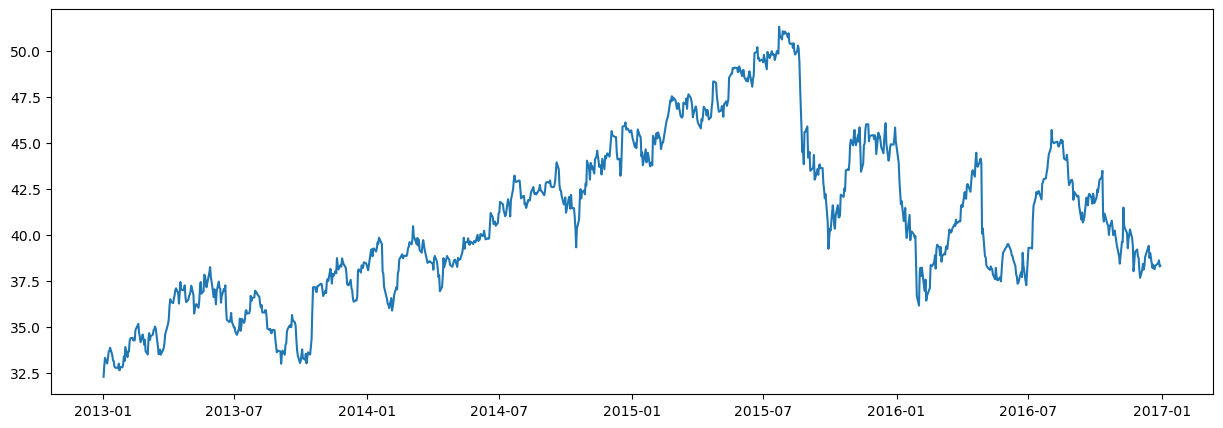

In [321]:
plt.figure(figsize = (15, 5))

plt.plot(df_final_study['date_upd'], df_final_study['open'])

plt.show()

In [178]:
df_final_study['For Year'] = df_final_study['date_upd'].dt.year - 1

In [180]:
df_final_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   symbol      1008 non-null   object        
 1   open        1008 non-null   float64       
 2   close       1008 non-null   float64       
 3   low         1008 non-null   float64       
 4   high        1008 non-null   float64       
 5   volume      1008 non-null   float64       
 6   date_upd    1008 non-null   datetime64[ns]
 7   openA       1008 non-null   float64       
 8   closeA      1008 non-null   float64       
 9   lowA        1008 non-null   float64       
 10  highA       1008 non-null   float64       
 11  volumeA     1008 non-null   float64       
 12  openBCR     1008 non-null   float64       
 13  closeBCR    1008 non-null   float64       
 14  lowBCR      1008 non-null   float64       
 15  highBCR     1008 non-null   float64       
 16  volumeBCR   1008 non-nul

In [211]:
df_final_study_fund = pd.merge(df_final_study, df_fundamentals_abt, on = 'For Year', how = 'inner')

In [192]:
df_final_study_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Columns: 166 entries, symbol to Estimated Shares Outstanding
dtypes: datetime64[ns](1), float64(160), int32(1), int64(1), object(3)
memory usage: 1.3+ MB


In [213]:
df_final_study_fund = df_final_study_fund.drop(columns = ['date_upd', 'For Year', 'Period Ending', 'Ticker Symbol', 'symbol'])

### Training with PCA Analysis

In [197]:
scaler = StandardScaler()

In [215]:
train_df, test_df = train_test_split(df_final_study_fund, test_size = 0.2, shuffle = False)

In [217]:
train_df_sc = scaler.fit_transform(train_df)
test_df_sc = scaler.transform(test_df)

In [225]:
print(train_df.shape)
print(test_df.shape)

(806, 161)
(202, 161)


In [247]:
pca = PCA(n_components = 10)
train_pca = pca.fit_transform(train_df_sc)
test_pca = pca.transform(test_df_sc)

In [249]:
print(pca.explained_variance_ratio_)

[0.60052624 0.14816478 0.05956096 0.03130212 0.02783383 0.01807201
 0.01229177 0.00826696 0.00738575 0.00714497]


In [251]:
np.sum(pca.explained_variance_ratio_[:10])

0.9205493868283238

In [253]:
train_pca.shape

(806, 10)

In [255]:
def create_sequence(x, y, n = 12):
    x_seq = []
    y_seq = []
    y = x[:, :y+1]
    for i in range(len(x) - n):
        x_seq.append(x[i:i+n])
        y_seq.append(y[i+n])

    return np.array(x_seq), np.array(y_seq)

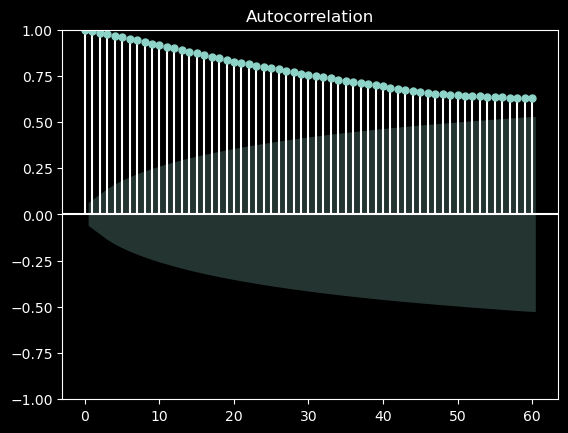

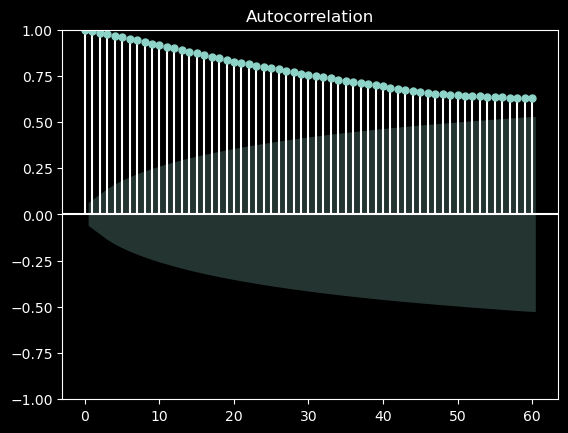

In [271]:
plot_acf(df_final_study_fund.iloc[:, 0], lags = 60)

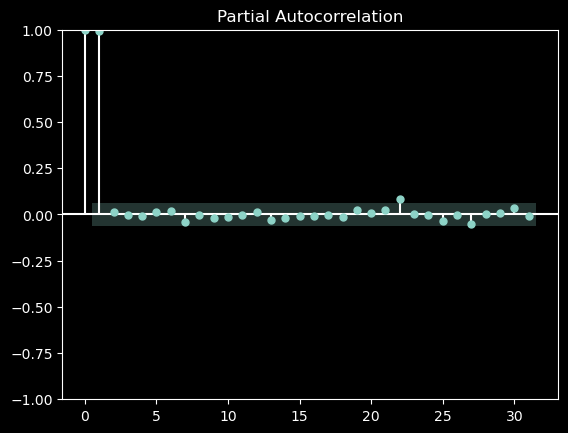

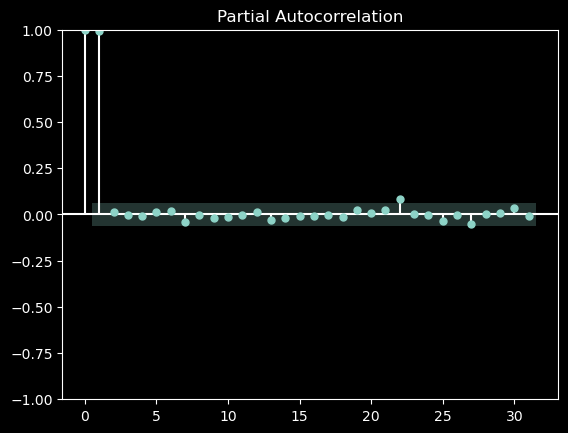

In [263]:
plot_pacf(df_final_study_fund.iloc[:, 0])

In [273]:
x_train, y_train = create_sequence(train_pca, 0)

In [277]:
y_train = train_df_sc[12:, :2]

In [279]:
x_train.shape

(794, 12, 10)

In [281]:
y_train.shape

(794, 2)

In [291]:
x_test, y_test = create_sequence(test_pca, 0)

In [293]:
y_test = test_df_sc[12:, :2]

In [333]:
model_1 = Sequential()
model_1.add(LSTM(units = 50, input_shape = (12, 10)))
model_1.add(Dense(2))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [335]:
model_1.compile(optimizer = 'adam', loss = 'mse')

In [337]:
history_1 = model_1.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3104
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0618
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0373
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0270
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0226
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoc

In [339]:
train_predictions = model_1.predict(x_train)
test_predictions = model_1.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [340]:
train_df_inv = np.zeros((train_df_sc.shape[0] - 12, train_df_sc.shape[1]))
train_df_inv[:, 0] = train_predictions[:, 0].flatten()
train_df_inv[:, 1] = train_predictions[:, 1].flatten()
train_predictions_rl = scaler.inverse_transform(train_df_inv)[:, :2]

test_df_inv = np.zeros((test_df_sc.shape[0] - 12, test_df_sc.shape[1]))
test_df_inv[:, 0] = test_predictions[:, 0].flatten()
test_df_inv[:, 1] = test_predictions[:, 1].flatten()
test_predictions_rl = scaler.inverse_transform(test_df_inv)[:, :2]

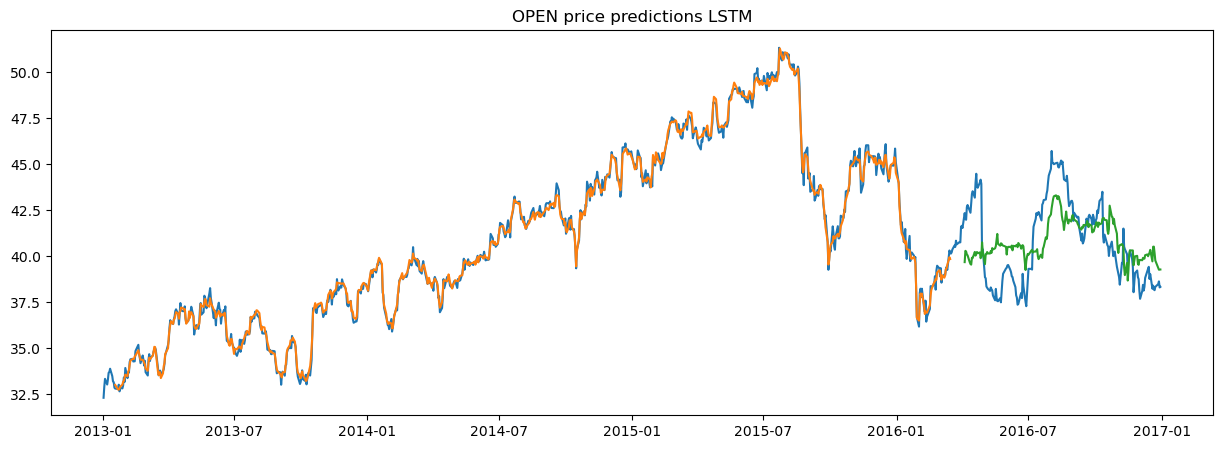

In [343]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['open'], label = 'real')
plt.plot(df_final_study['date_upd'][12:806],train_predictions_rl[:, 0], label = 'train_pred')
plt.plot(df_final_study['date_upd'][818:], test_predictions_rl[:, 0], label = 'test_predictions')

plt.title('OPEN price predictions LSTM')
plt.show()

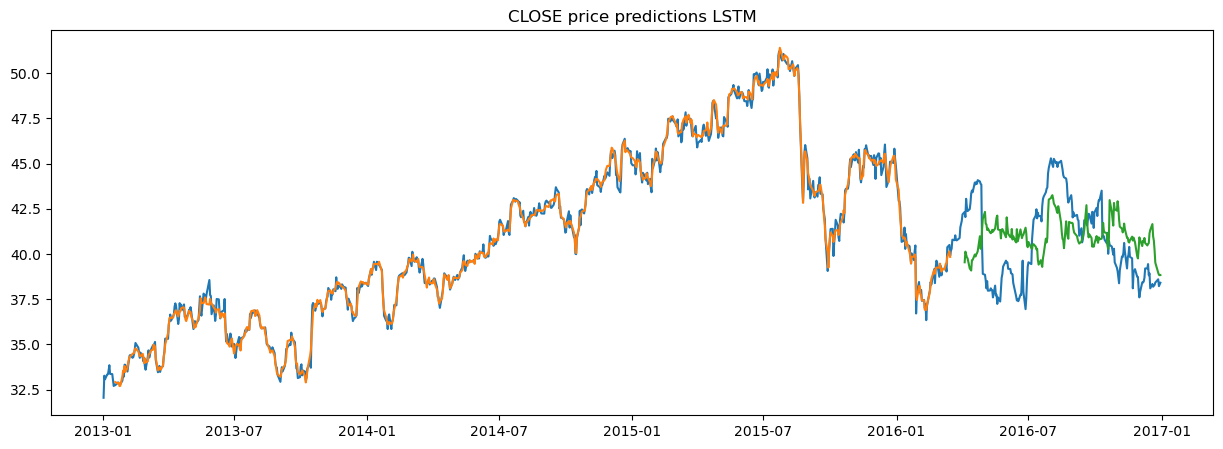

In [345]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['close'], label = 'real')
plt.plot(df_final_study['date_upd'][12:806],train_predictions_rl[:, 1], label = 'train_pred')
plt.plot(df_final_study['date_upd'][818:], test_predictions_rl[:, 1], label = 'test_predictions')

plt.title('CLOSE price predictions LSTM')
plt.show()

In [349]:
mae = mean_absolute_error(df_final_study['open'][818:], test_predictions_rl[:, 0])
mse = mean_squared_error(df_final_study['open'][818:], test_predictions_rl[:, 0])

print(f'OPEN Prediction MAE: {mae}')
print(f'OPEN Prediction MSE: {mse}')

OPEN Prediction MAE: 1.6711287915638613
OPEN Prediction MSE: 3.718499379619815


In [351]:
mae_cl = mean_absolute_error(df_final_study['close'][818:], test_predictions_rl[:, 0])
mse_cl = mean_squared_error(df_final_study['close'][818:], test_predictions_rl[:, 0])

print(f'OPEN Prediction MAE: {mae_cl}')
print(f'OPEN Prediction MSE: {mse_cl}')

OPEN Prediction MAE: 1.6910771636358288
OPEN Prediction MSE: 3.8278132319103784


### TSFRESH Features generation

In [356]:
!pip install tsfresh

  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/95.8 kB ? eta -:--:--
   ------------------------- -------------- 61.4/95.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 95.8/95.8 kB 1.4 MB/s eta 0:00:00
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
   ---------------------------------------- 0.0/176.5 kB ? eta -:--:--
   ---------------------------------------- 176.5/176.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [366]:
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute, make_forecasting_frame

In [468]:
df_prices_abt_for_features = df_prices_abt.drop(columns = ['symbol'])
df_prices_abt_for_features.reset_index(drop = True, inplace = True)
df_prices_abt_for_features = df_prices_abt_for_features.drop([0])
df_prices_abt_for_features.reset_index(drop = True, inplace = True)

In [470]:
df_prices_abt_for_features

,open,close,low,high,volume,date_upd
0,32.900002,33.270000,32.740002,33.380001,22148200.0,2013-01-03
1,33.330002,33.070000,32.849998,33.430000,15820100.0,2013-01-04
2,33.020000,33.340000,32.849998,33.340000,13120000.0,2013-01-07
3,33.290001,33.349998,33.080002,33.560001,15042300.0,2013-01-08
4,33.660000,33.570000,33.090000,33.709999,11313000.0,2013-01-09
...,...,...,...,...,...,...
1002,38.330002,38.419998,38.220001,38.650002,4625600.0,2016-12-23
1003,38.480000,38.599998,38.470001,38.939999,6633700.0,2016-12-27
1004,38.630001,38.220001,38.080002,38.770000,6828500.0,2016-12-28
1005,38.299999,38.310001,38.110001,38.509998,7050800.0,2016-12-29


In [368]:
df_shift, _ = make_forecasting_frame(df_prices_abt_for_features['open'], kind = 'price', max_timeshift = 12, rolling_direction = 1)

C:\Users\User\anaconda3\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


In [370]:
df_shift.head()

,id,time,value,kind
1314,"(id, 354818)",354335,32.299999,price
1316,"(id, 355301)",354335,32.299999,price
1317,"(id, 355301)",354818,32.900002,price
1319,"(id, 355784)",354335,32.299999,price
1320,"(id, 355784)",354818,32.900002,price


In [372]:
open_features= extract_features(df_shift, column_id = 'id', column_sort = 'time', column_value = 'value')

Feature Extraction: 100%|██████████| 10/10 [00:38<00:00,  3.81s/it]


In [472]:
impute(open_features)
open_filtered_features = select_features(open_features, _)
open_filtered_features.reset_index(drop = True, inplace = True)

In [474]:
open_filtered_features.head()

,value__sum_values,value__c3__lag_3,"value__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)",value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,value__quantile__q_0.4,value__quantile__q_0.6,value__quantile__q_0.7,value__quantile__q_0.8,...,value__last_location_of_maximum,value__first_location_of_minimum,value__large_standard_deviation__r_0.4,"value__fft_coefficient__attr_""imag""__coeff_4",value__autocorrelation__lag_6,"value__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""min""","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0",value__autocorrelation__lag_9,value__lempel_ziv_complexity__bins_10,"value__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""max"""
0,32.299999,0.0,96.711324,32.299999,32.299999,32.299999,32.299999,32.299999,32.299999,32.299999,...,1.00,0.0,0.0,0.060621,-0.464446,1.0,0.000000,-0.741845,1.0,-1.0
1,65.200001,0.0,96.711324,32.359999,32.420000,32.480000,32.540000,32.660001,32.720001,32.780001,...,1.00,0.0,1.0,0.060621,-0.464446,1.0,0.000000,-0.741845,1.0,-1.0
2,98.530003,0.0,96.711324,32.420000,32.540000,32.660001,32.780001,32.986002,33.072002,33.158002,...,1.00,0.0,1.0,0.060621,-0.464446,1.0,0.000000,-0.741845,1.0,-1.0
3,131.550003,0.0,96.711324,32.480000,32.660001,32.840002,32.924002,32.996000,33.051000,33.144001,...,0.75,0.0,0.0,0.060621,-0.464446,1.0,0.000000,-0.741845,1.0,-1.0
4,164.840004,0.0,96.711324,32.540000,32.780001,32.924002,32.972001,33.128000,33.236001,33.298001,...,0.60,0.0,0.0,0.060621,-0.464446,1.0,0.027225,-0.741845,0.8,-1.0


In [539]:
df_shift_cl, _cl = make_forecasting_frame(df_prices_abt_for_features['close'], kind = 'price', max_timeshift = 12, rolling_direction = 1)
close_features= extract_features(df_shift_cl, column_id = 'id', column_sort = 'time', column_value = 'value')
impute(close_features)
close_filtered_features = select_features(close_features, _cl)
close_filtered_features.reset_index(drop = True, inplace = True)

Feature Extraction: 100%|██████████| 10/10 [00:38<00:00,  3.85s/it]
C:\Users\User\anaconda3\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['value__partial_autocorrelation__lag_6'
 'value__partial_autocorrelation__lag_7'
 'value__partial_autocorrelation__lag_8'
 'value__partial_autocorrelation__lag_9'
 'value__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_12__w_10__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)'
 'value__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)

In [541]:
df_final_study_generated = pd.concat([df_prices_abt_for_features, open_filtered_features, close_filtered_features], axis = 1)

In [412]:
open_filtered_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1007 entries, ('id', 354818) to ('id', 850770)
Columns: 154 entries, value__sum_values to value__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"max"
dtypes: float64(154)
memory usage: 1.3+ MB


In [484]:
df_prices_abt_for_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   open      1007 non-null   float64       
 1   close     1007 non-null   float64       
 2   low       1007 non-null   float64       
 3   high      1007 non-null   float64       
 4   volume    1007 non-null   float64       
 5   date_upd  1007 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 47.3 KB


In [543]:
df_final_study_generated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Columns: 341 entries, open to value__fourier_entropy__bins_10
dtypes: datetime64[ns](1), float64(340)
memory usage: 2.6 MB


In [545]:
df_final_study_generated_ = df_final_study_generated.drop(columns = ['date_upd'], axis = 1)

In [547]:
df_train_gen, df_test_gen = train_test_split(df_final_study_generated_, test_size = 0.2, shuffle = False)

In [549]:
scaler_2 = StandardScaler()

In [551]:
df_train_gen_sc = scaler_2.fit_transform(df_train_gen)
df_test_gen_sc = scaler_2.transform(df_test_gen)

In [607]:
df_train_gen

,open,close,low,high,volume,value__sum_values,value__c3__lag_3,"value__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)",value__quantile__q_0.1,value__quantile__q_0.2,...,value__symmetry_looking__r_0.1,"value__fft_coefficient__attr_""abs""__coeff_5",value__autocorrelation__lag_2,"value__fft_coefficient__attr_""imag""__coeff_4","value__agg_autocorrelation__f_agg_""mean""__maxlag_40",value__last_location_of_maximum,"value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",value__symmetry_looking__r_0.2,"value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",value__fourier_entropy__bins_10
0,32.900002,33.270000,32.740002,33.380001,22148200.0,32.299999,0.000000,96.711324,32.299999,32.299999,...,0.0,0.914274,0.279380,0.060625,0.000000,1.000000,0.000000,0.0,0.000000e+00,1.277034
1,33.330002,33.070000,32.849998,33.430000,15820100.0,65.200001,0.000000,96.711324,32.359999,32.420000,...,1.0,0.914274,0.279380,0.060625,-1.000000,0.500000,0.000000,1.0,0.000000e+00,-0.000000
2,33.020000,33.340000,32.849998,33.340000,13120000.0,98.530003,0.000000,96.711324,32.420000,32.540000,...,0.0,0.914274,0.375212,0.060625,-0.281197,1.000000,0.000000,1.0,0.000000e+00,0.693147
3,33.290001,33.349998,33.080002,33.560001,15042300.0,131.550003,0.000000,96.711324,32.480000,32.660001,...,0.0,0.914274,-0.643798,0.060625,-0.273473,1.000000,0.000000,1.0,9.998000e-03,1.098612
4,33.660000,33.570000,33.090000,33.709999,11313000.0,164.840004,0.000000,96.711324,32.540000,32.780001,...,1.0,0.914274,-0.045283,0.060625,-0.405343,1.000000,0.001225,1.0,1.150000e-01,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,39.259998,39.279999,39.009998,39.389999,6196000.0,467.279998,59354.048540,93.212636,38.532999,38.618000,...,1.0,0.960405,-0.560324,1.290379,-0.111782,0.250000,0.109425,1.0,7.166600e-02,1.153742
801,39.410000,39.029999,38.820000,39.880001,8716900.0,468.009997,59445.514565,93.373706,38.589001,38.861998,...,1.0,0.559792,-0.436244,-0.303111,-0.101721,0.166667,0.028022,1.0,7.166600e-02,1.277034
802,39.250000,40.369999,39.080002,40.450001,11786400.0,468.509997,59450.913385,93.409861,38.589001,38.861998,...,1.0,1.620818,-0.080278,0.025981,0.058245,1.000000,0.019544,1.0,-8.000000e-07,1.549826
803,40.310001,40.500000,39.990002,40.680000,5707800.0,469.579997,59623.060263,93.392110,38.855998,38.918000,...,1.0,0.821672,-0.075359,1.030572,-0.171951,1.000000,0.019544,1.0,4.799960e-02,1.277034


In [585]:
df_test_gen_sc_.shape

(201, 340)

In [583]:
df_test_gen_sc_ = df_test_gen_sc[:201, :] # some generated features in the last row are NaN

In [569]:
pca_2 = PCA(n_components = 30)

In [587]:
df_train_gen_pca = pca_2.fit_transform(df_train_gen_sc)
df_test_gen_pca = pca_2.transform(df_test_gen_sc_)

In [589]:
np.sum(pca_2.explained_variance_ratio_)

0.8999754850680723

In [621]:
x_train_gen, y_train_gen = create_sequence(df_train_gen_pca, 0)
y_train_gen = df_train_gen_sc[12:, :2]

x_test_gen, y_test_gen = create_sequence(df_test_gen_pca, 0)
y_test_gen = df_test_gen_sc[12:, :2]

In [623]:
model_2 = Sequential()
model_2.add(LSTM(units = 50, input_shape = (12, 30)))
model_2.add(Dense(2))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [625]:
model_2.compile(optimizer = 'adam', loss = 'mse')

In [627]:
history_2 = model_2.fit(x_train_gen, y_train_gen, batch_size = 32, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8421
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1581
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0628
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0398
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0249
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061
Epoc

In [629]:
train_predictions_gen = model_2.predict(x_train_gen)
test_predictions_gen = model_2.predict(x_test_gen)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [631]:
train_df_inv_gen = np.zeros((df_train_gen_sc.shape[0] - 12, df_train_gen_sc.shape[1]))
train_df_inv_gen[:, 0] = train_predictions_gen[:, 0].flatten()
train_df_inv_gen[:, 1] = train_predictions_gen[:, 1].flatten()
train_predictions_rl_gen = scaler_2.inverse_transform(train_df_inv_gen)[:, :2]

test_df_inv_gen = np.zeros((df_test_gen_sc.shape[0] - 13, df_test_gen_sc.shape[1]))
test_df_inv_gen[:, 0] = test_predictions_gen[:, 0].flatten()
test_df_inv_gen[:, 1] = test_predictions_gen[:, 1].flatten()
test_predictions_rl_gen = scaler_2.inverse_transform(test_df_inv_gen)[:, :2]

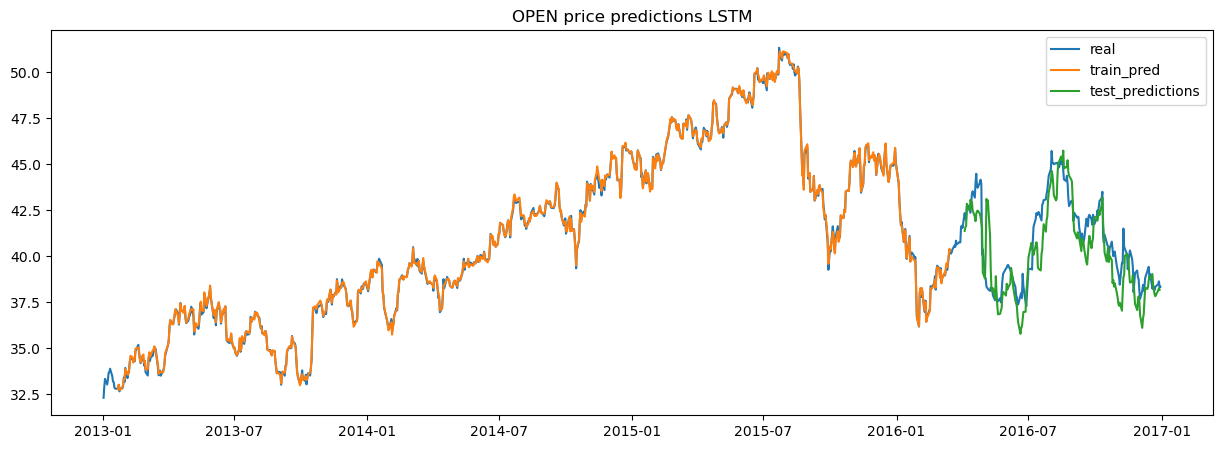

In [645]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['open'], label = 'real')
plt.plot(df_final_study_generated['date_upd'][12:805],train_predictions_rl_gen[:, 0], label = 'train_pred')
plt.plot(df_final_study_generated['date_upd'][817:-1], test_predictions_rl_gen[:, 0], label = 'test_predictions')

plt.legend()
plt.title('OPEN price predictions LSTM')
plt.show()

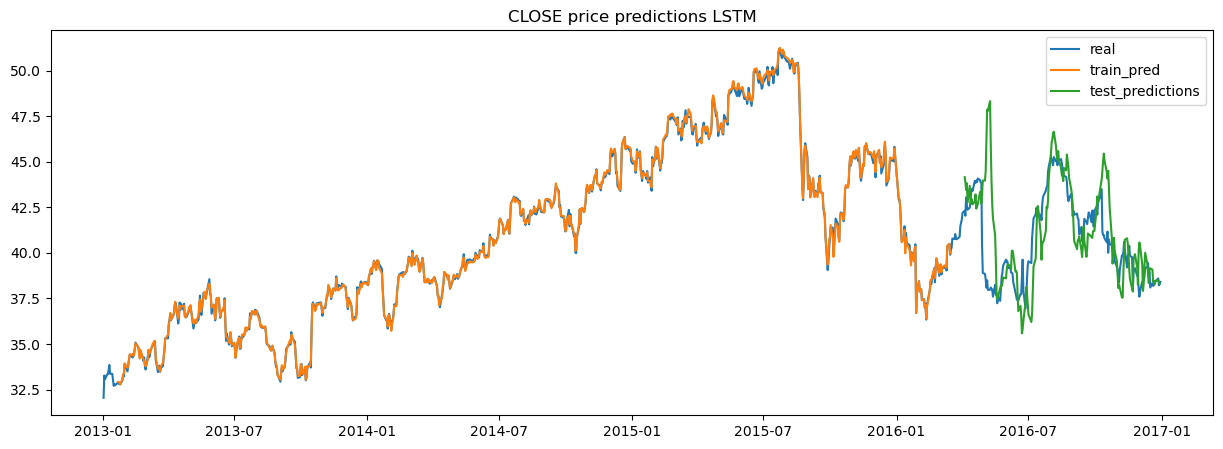

In [647]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['close'], label = 'real')
plt.plot(df_final_study_generated['date_upd'][12:805],train_predictions_rl_gen[:, 1], label = 'train_pred')
plt.plot(df_final_study_generated['date_upd'][817:-1], test_predictions_rl_gen[:, 1], label = 'test_predictions')

plt.legend()
plt.title('CLOSE price predictions LSTM')
plt.show()

In [649]:
mae_gen = mean_absolute_error(df_final_study['open'][818:-1], test_predictions_rl_gen[:, 0])
mse_gen = mean_squared_error(df_final_study['open'][818:-1], test_predictions_rl_gen[:, 0])

print(f'OPEN Prediction MAE: {mae_gen}')
print(f'OPEN Prediction MSE: {mse_gen}')

OPEN Prediction MAE: 1.0387854918971409
OPEN Prediction MSE: 1.7877073489587108


In [651]:
mae_gen_cl = mean_absolute_error(df_final_study['close'][818:-1], test_predictions_rl_gen[:, 0])
mse_gen_cl = mean_squared_error(df_final_study['close'][818:-1], test_predictions_rl_gen[:, 0])

print(f'OPEN Prediction MAE: {mae_gen_cl}')
print(f'OPEN Prediction MSE: {mse_gen_cl}')

OPEN Prediction MAE: 1.0737963018424197
OPEN Prediction MSE: 1.8837222938272287


### RNN with features generated

In [656]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units = 50, input_shape = (12, 30)))
model_rnn.add(Dense(2))
model_rnn.compile(optimizer = 'adam', loss = 'mse')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [658]:
history_rnn = model_rnn.fit(x_train_gen, y_train_gen, batch_size = 32, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3282
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3317
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1925
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1279
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1043
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0923
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0793
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0719
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0665
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0589
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0502
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0477
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0400
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0367
Epoc

In [660]:
train_predictions_gen_rnn = model_rnn.predict(x_train_gen)
test_predictions_gen_rnn = model_rnn.predict(x_test_gen)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [662]:
train_df_inv_gen_rnn = np.zeros((df_train_gen_sc.shape[0] - 12, df_train_gen_sc.shape[1]))
train_df_inv_gen_rnn[:, 0] = train_predictions_gen_rnn[:, 0].flatten()
train_df_inv_gen_rnn[:, 1] = train_predictions_gen_rnn[:, 1].flatten()
train_predictions_rl_gen_rnn = scaler_2.inverse_transform(train_df_inv_gen_rnn)[:, :2]

test_df_inv_gen_rnn = np.zeros((df_test_gen_sc.shape[0] - 13, df_test_gen_sc.shape[1]))
test_df_inv_gen_rnn[:, 0] = test_predictions_gen_rnn[:, 0].flatten()
test_df_inv_gen_rnn[:, 1] = test_predictions_gen_rnn[:, 1].flatten()
test_predictions_rl_gen_rnn = scaler_2.inverse_transform(test_df_inv_gen_rnn)[:, :2]

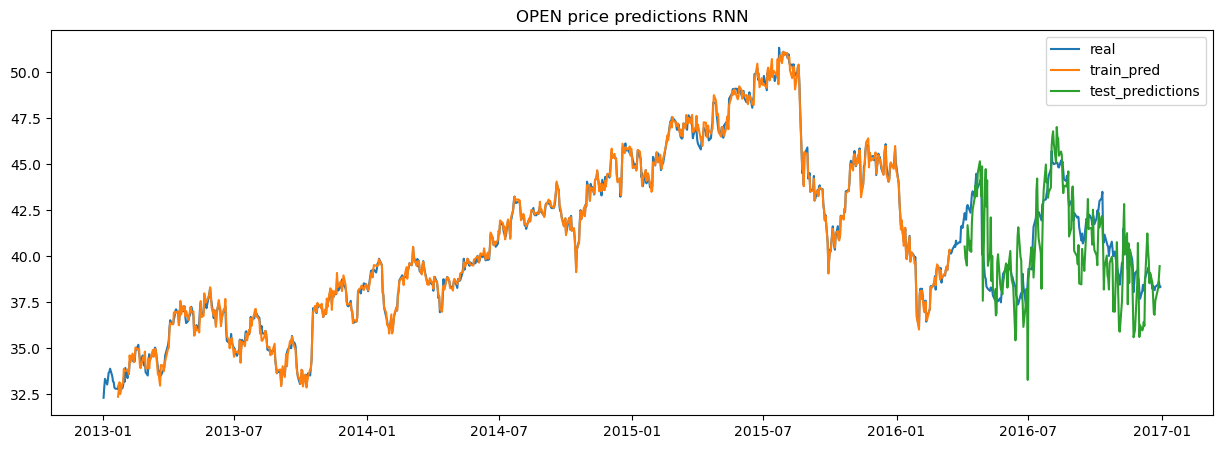

In [664]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['open'], label = 'real')
plt.plot(df_final_study_generated['date_upd'][12:805],train_predictions_rl_gen_rnn[:, 0], label = 'train_pred')
plt.plot(df_final_study_generated['date_upd'][817:-1], test_predictions_rl_gen_rnn[:, 0], label = 'test_predictions')

plt.legend()
plt.title('OPEN price predictions RNN')
plt.show()

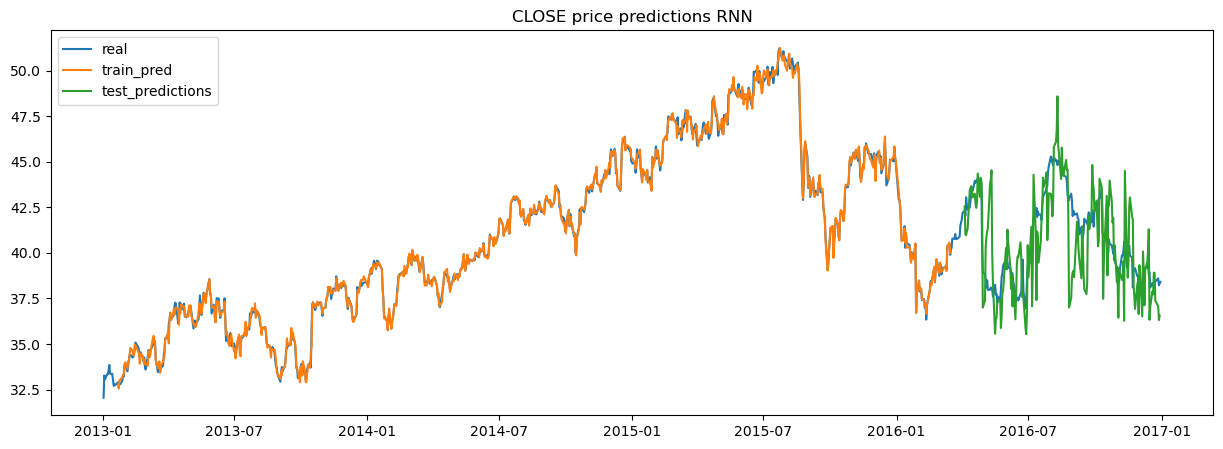

In [666]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['close'], label = 'real')
plt.plot(df_final_study_generated['date_upd'][12:805],train_predictions_rl_gen_rnn[:, 1], label = 'train_pred')
plt.plot(df_final_study_generated['date_upd'][817:-1], test_predictions_rl_gen_rnn[:, 1], label = 'test_predictions')

plt.legend()
plt.title('CLOSE price predictions RNN')
plt.show()

In [728]:
mae_gen_rnn = mean_absolute_error(df_final_study['open'][818:-1], test_predictions_rl_gen_rnn[:, 0])
mse_gen_rnn = mean_squared_error(df_final_study['open'][818:-1], test_predictions_rl_gen_rnn[:, 0])

print(f'OPEN Prediction MAE: {mae_gen_rnn}')
print(f'OPEN Prediction MSE: {mse_gen_rnn}')

OPEN Prediction MAE: 1.3982893645400276
OPEN Prediction MSE: 3.248341386277995


In [730]:
mae_gen_cl_rnn = mean_absolute_error(df_final_study['close'][818:-1], test_predictions_rl_gen_rnn[:, 0])
mse_gen_cl_rnn = mean_squared_error(df_final_study['close'][818:-1], test_predictions_rl_gen_rnn[:, 0])

print(f'OPEN Prediction MAE: {mae_gen_cl_rnn}')
print(f'OPEN Prediction MSE: {mse_gen_cl_rnn}')

OPEN Prediction MAE: 1.4583667438360013
OPEN Prediction MSE: 3.473241656947031


### GRU with features generated

In [693]:
model_gru = Sequential()
model_gru.add(GRU(units = 50, input_shape = (12, 30)))
model_gru.add(Dense(2))
model_gru.compile(optimizer = 'adam', loss = 'mse')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [695]:
history_gru = model_gru.fit(x_train_gen, y_train_gen, batch_size = 32, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7729
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1407
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0616
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0416
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0309
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0239
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095
Epoc

In [697]:
train_predictions_gen_gru = model_gru.predict(x_train_gen)
test_predictions_gen_gru = model_gru.predict(x_test_gen)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [705]:
train_df_inv_gen_gru = np.zeros((df_train_gen_sc.shape[0] - 12, df_train_gen_sc.shape[1]))
train_df_inv_gen_gru[:, 0] = train_predictions_gen_gru[:, 0].flatten()
train_df_inv_gen_gru[:, 1] = train_predictions_gen_gru[:, 1].flatten()
train_predictions_rl_gen_gru = scaler_2.inverse_transform(train_df_inv_gen_gru)[:, :2]

test_df_inv_gen_gru = np.zeros((df_test_gen_sc.shape[0] - 13, df_test_gen_sc.shape[1]))
test_df_inv_gen_gru[:, 0] = test_predictions_gen_gru[:, 0].flatten()
test_df_inv_gen_gru[:, 1] = test_predictions_gen_gru[:, 1].flatten()
test_predictions_rl_gen_gru = scaler_2.inverse_transform(test_df_inv_gen_gru)[:, :2]

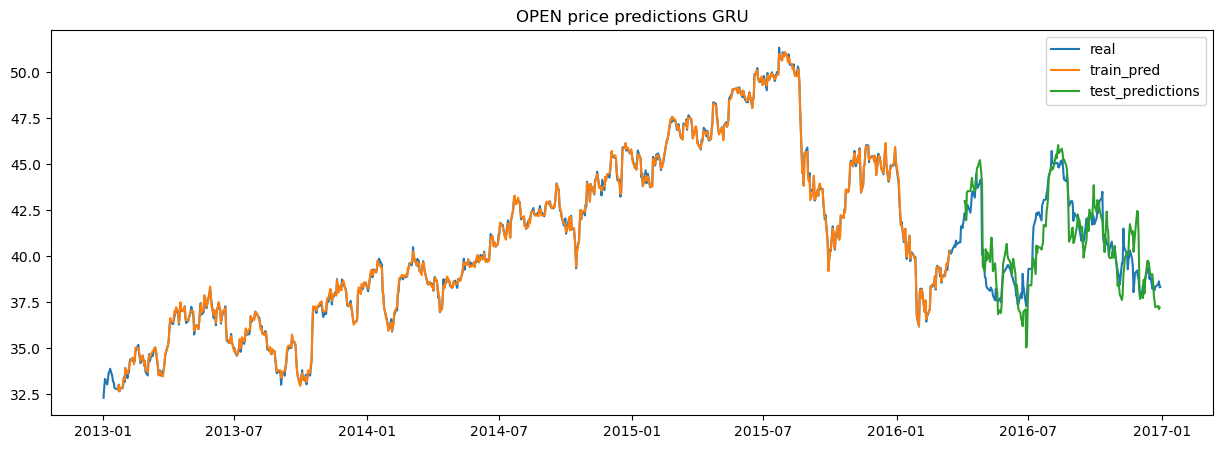

In [707]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['open'], label = 'real')
plt.plot(df_final_study_generated['date_upd'][12:805],train_predictions_rl_gen_gru[:, 0], label = 'train_pred')
plt.plot(df_final_study_generated['date_upd'][817:-1], test_predictions_rl_gen_gru[:, 0], label = 'test_predictions')

plt.legend()
plt.title('OPEN price predictions GRU')
plt.show()

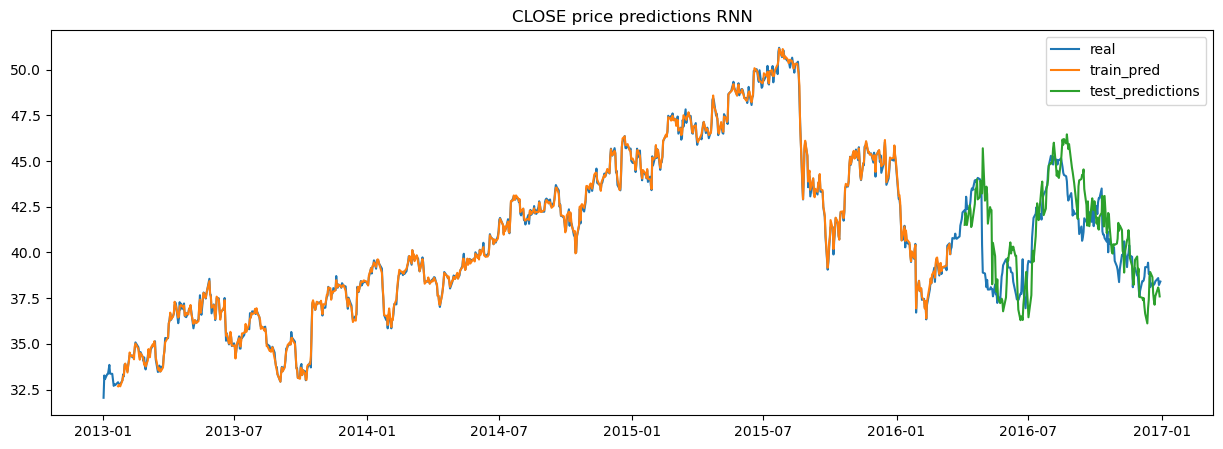

In [709]:
plt.figure(figsize = (15, 5))
plt.plot(df_final_study['date_upd'], df_final_study['close'], label = 'real')
plt.plot(df_final_study_generated['date_upd'][12:805],train_predictions_rl_gen_gru[:, 1], label = 'train_pred')
plt.plot(df_final_study_generated['date_upd'][817:-1], test_predictions_rl_gen_gru[:, 1], label = 'test_predictions')

plt.legend()
plt.title('CLOSE price predictions RNN')
plt.show()

In [713]:
mae_gen_gru = mean_absolute_error(df_final_study['open'][818:-1], test_predictions_rl_gen_gru[:, 0])
mse_gen_gru = mean_squared_error(df_final_study['open'][818:-1], test_predictions_rl_gen_gru[:, 0])

print(f'OPEN Prediction MAE: {mae_gen_gru}')
print(f'OPEN Prediction MSE: {mse_gen_gru}')

OPEN Prediction MAE: 0.9442709555749893
OPEN Prediction MSE: 1.4319175021139692


In [715]:
mae_gen_cl_gru = mean_absolute_error(df_final_study['close'][818:-1], test_predictions_rl_gen_gru[:, 0])
mse_gen_cl_gru = mean_squared_error(df_final_study['close'][818:-1], test_predictions_rl_gen_gru[:, 0])

print(f'OPEN Prediction MAE: {mae_gen_cl_gru}')
print(f'OPEN Prediction MSE: {mse_gen_cl_gru}')

OPEN Prediction MAE: 1.018586066194379
OPEN Prediction MSE: 1.66275260475485


### Final Conclusion

In [718]:
mae = mean_absolute_error(df_final_study['open'][818:], test_predictions_rl[:, 0])
mse = mean_squared_error(df_final_study['open'][818:], test_predictions_rl[:, 0])

print(f'OPEN Prediction MAE: {mae}') # my features lstm
print(f'OPEN Prediction MSE: {mse}')

OPEN Prediction MAE: 1.6711287915638613
OPEN Prediction MSE: 3.718499379619815


In [ ]:
mae_gen = mean_absolute_error(df_final_study['open'][818:-1], test_predictions_rl_gen[:, 0])
mse_gen = mean_squared_error(df_final_study['open'][818:-1], test_predictions_rl_gen[:, 0])

print(f'OPEN Prediction MAE: {mae_gen}') #tsfresh gen lstm
print(f'OPEN Prediction MSE: {mse_gen}')

In [736]:
df_res = {
   'Category' :['my_feat_LSTM', 'tsf_LSTM', 'tsf_RNN', 'tsf_GRU'],
    'MSE' : [mse, mse_gen, mse_gen_rnn, mse_gen_gru],
    'MAE' : [mae, mae_gen, mae_gen_rnn, mae_gen_gru]
}

df_res = pd.DataFrame(df_res)

df_res_cl = {
   'Category' :['my_feat_LSTM', 'tsf_LSTM', 'tsf_RNN', 'tsf_GRU'],
    'MSE' : [mse_cl, mse_gen_cl, mse_gen_cl_rnn, mse_gen_cl_gru],
    'MAE' : [mae_cl, mae_gen_cl, mae_gen_cl_rnn, mae_gen_cl_gru]
}

df_res_cl = pd.DataFrame(df_res_cl)

print('OPEN Price')
print(df_res)
print('CLOSE Price')
print(df_res_cl)

OPEN Price
       Category       MSE       MAE
0  my_feat_LSTM  3.718499  1.671129
1      tsf_LSTM  1.787707  1.038785
2       tsf_RNN  3.248341  1.398289
3       tsf_GRU  1.431918  0.944271
CLOSE Price
       Category       MSE       MAE
0  my_feat_LSTM  3.827813  1.691077
1      tsf_LSTM  1.883722  1.073796
2       tsf_RNN  3.473242  1.458367
3       tsf_GRU  1.662753  1.018586
